Statistics assingment

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import math as m
from statsmodels.stats.weightstats import ztest
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import norm

In [3]:
# 1

int_list = np.random.randint(90,130,100)
weights = np.random.rand(100)

# (i) Mean
def calculate_mean(numbers):
    return np.mean(numbers)

print("Mean:", calculate_mean(int_list))

# (i) Median
def calculate_median(numbers):
    return np.median(numbers)

print("Median:", calculate_median(int_list))

# (ii) Mode
def calculate_mode(numbers):
    mode_result = st.mode(numbers)
    return mode_result

print("Mode:", calculate_mode(int_list))

# (iii) Weighted Mean
def calculate_weighted_mean(values, weights):
    return np.average(values, weights=weights)

print("Weighted Mean:", calculate_weighted_mean(int_list, weights))

# (iv) Geometric Mean
def calculate_geometric_mean(numbers):
    return stats.gmean(numbers)

print("Geometric Mean:", calculate_geometric_mean(int_list))

# (v) Harmonic Mean
def calculate_harmonic_mean(numbers):
    return stats.hmean(numbers)

print("Harmonic Mean:", calculate_harmonic_mean(int_list))

# (vi) Midrange
def calculate_midrange(numbers):
    return (np.min(numbers) + np.max(numbers)) / 2

print("Midrange:", calculate_midrange(int_list))

# (vii) Trimmed Mean
def calculate_trimmed_mean(numbers, proportion_to_cut):
    return stats.trim_mean(numbers, proportion_to_cut)

print("Trimmed Mean (10%):", calculate_trimmed_mean(int_list, 0.1))


Mean: 110.17
Median: 112.0
Mode: 127
Weighted Mean: 110.1628459885572
Geometric Mean: 109.48925323642243
Harmonic Mean: 108.7998108630377
Midrange: 109.5
Trimmed Mean (10%): 110.4375


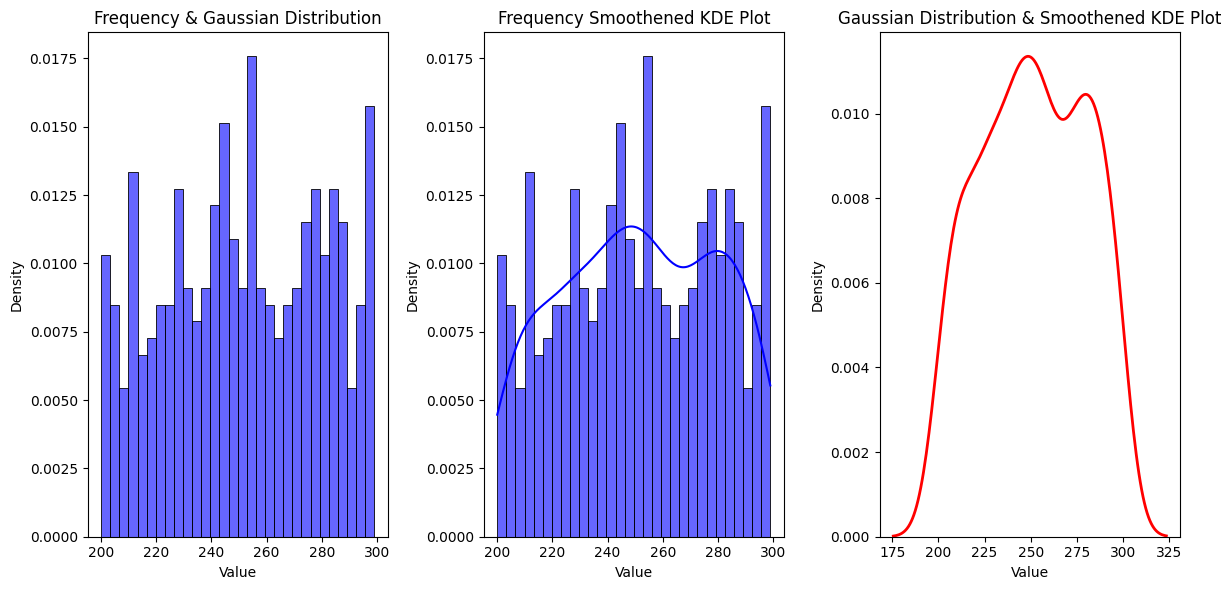

In [7]:
# 2

int_list2 = np.random.randint(200,300,500)

mean = np.mean(int_list2)
std_dev = np.std(int_list2)

# Frequency & Gaussian Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(int_list2, kde=False, stat="density", bins=30, color='blue', alpha=0.6)
plt.title('Frequency & Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Frequency smoothened KDE plot
plt.subplot(1, 3, 2)
sns.histplot(int_list2, kde=True, stat="density", bins=30, color='blue', alpha=0.6)
plt.title('Frequency Smoothened KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')

# Gaussian distribution & smoothened KDE plot
plt.subplot(1, 3, 3)
sns.kdeplot(int_list2, color='red', linewidth=2)
plt.title('Gaussian Distribution & Smoothened KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [11]:
# calculate the range
def calculate_range(data):
    return max(data) - min(data)

print("the range is:",calculate_range(int_list2))

# the variance and standard deviation 
var = np.var(int_list2)
std = np.std(int_list2)
print(f"the variance value is: {var}\n the standard deviation :",std)

# the interquartile range
def compute_iqr(data):
    data_sorted = np.sort(data)
    q1 = np.percentile(data_sorted, 25)
    q3 = np.percentile(data_sorted, 75)

    iqr = q3 - q1
    return iqr

print("the interquartile range is :",compute_iqr(int_list2))

#the coefficient of variation
def calculate_cv(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    
    cv = (std_dev / mean) * 100
    return cv

print("the coefficient of variation is :",calculate_cv(int_list2))

# the mean absolute deviation
def calculate_mad(data):
    mean = np.mean(data)
    abs_deviations = [abs(x - mean) for x in data]
    mad = np.mean(abs_deviations)
    return mad

print(" the mean absolute deviation value is :",calculate_mad(int_list2))

#the quartile deviation
def calculate_quartile_deviation(data):
    data_sorted = np.sort(data)
    q1 = np.percentile(data_sorted, 25)
    q3 = np.percentile(data_sorted, 75)
    
    iqr = q3 - q1
    
    quartile_deviation = iqr / 2
    
    return quartile_deviation

print("the quartile deviation value is :",calculate_quartile_deviation(int_list2))

# the range-based coefficient of dispersion 
def range_based_coefficient_of_dispersion(data):
    mean = np.mean(data)
    data_range = np.max(data) - np.min(data)
    
    coefficient_of_dispersion = (data_range / mean) * 100
    
    return coefficient_of_dispersion

print("the range-based coefficient of dispersion value is :",range_based_coefficient_of_dispersion(int_list2))

the range is: 99
the variance value is: 796.964396
 the standard deviation : 28.230557840751217
the interquartile range is : 48.0
the coefficient of variation is : 11.229249505076021
 the mean absolute deviation value is : 24.107608
the quartile deviation value is : 24.0
the range-based coefficient of dispersion value is : 39.379161661402854
